# Linear model: AnAge

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 
Specifically, we will try to find to examine [Kleiber's law](https://en.wikipedia.org/wiki/Kleiber%27s_law) which suggests that the metabolic rate of animals is proportional to their body mass raised to power 3/4, that is:
$$
W \sim m^{3/4}
$$
where $W$ is metabolic rate and $m$ is body mass.

The data is in the file `../data/anage_data.txt`.

First, remove rows in which the body mass is `NaN`.
Second, plot the linear regression line for the entire dataset (you can use [`sns.lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)).
Third, calculate a separate linear regression for each value of the `Class` column. Try to use [`df.groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) and iterate over the resulting data grouped dataframe.
Fourth, plot a separate scatterplot and linear regression plot for each classes (you can use [`sns.lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)).

Data path: /Users/manashchakraborty/MCbLocal/mcbGIT/mcbdotme72repos/mcb-RAW/Learnings/KLA-IntroToDeepLearning/DataSciPy-kla2025/data/anage_data.txt


<Figure size 800x600 with 0 Axes>

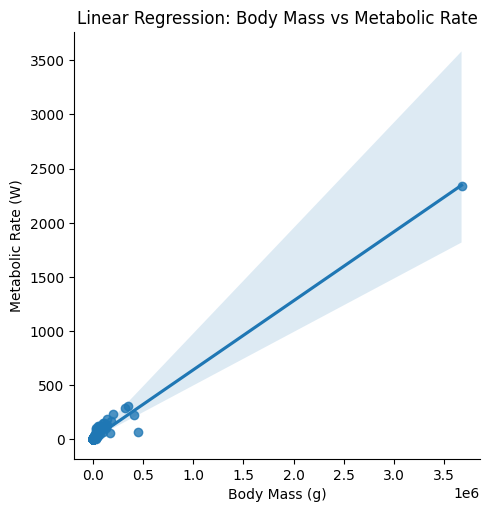

<Figure size 800x600 with 0 Axes>

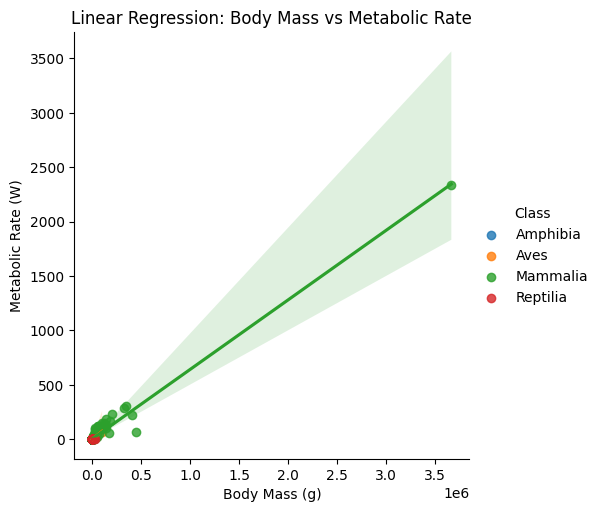

In [34]:
# MCB-Try#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


BASE = Path("/Users/manashchakraborty/MCbLocal/mcbGIT/mcbdotme72repos/mcb-RAW/Learnings/KLA-IntroToDeepLearning/DataSciPy-kla2025/")


# Load dataset
data_path = str(BASE / "data" / "anage_data.txt")
print("Data path:", data_path)
data = pd.read_csv(data_path, sep="\t")

# [1] Drop any rows with NaN Bodymass.
# print(data.columns)
drp_col_1 = 'Body mass (g)'
drp_col_2 = 'IMR (per yr)'
drp_col_3 = 'MRDT (yrs)'

data = data.dropna(subset=[drp_col_1])
data.head(10)

# [2] Linear Regression of Bodymass vs Metabolic Rate:
fig_1 = plt.figure(figsize=(8, 6))
x_col = 'Body mass (g)'
y_col = 'Metabolic rate (W)'
sns.lmplot(data=data, x=x_col, y=y_col)
plt.xlabel("Body Mass (g)")
plt.ylabel("Metabolic Rate (W)")
plt.title("Linear Regression: Body Mass vs Metabolic Rate")
plt.show()

# [3] Linear Regression: Separate for each 'Class' of animal
fig_2 = plt.figure(figsize=(8, 6))
x_col = 'Body mass (g)'
y_col = 'Metabolic rate (W)'
hue_col = 'Class'
sns.lmplot(data=data, x=x_col, y=y_col, hue=hue_col)
plt.xlabel("Body Mass (g)")
plt.ylabel("Metabolic Rate (W)")
plt.title("Linear Regression: Body Mass vs Metabolic Rate")
plt.show()



In [25]:
data.columns

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')

In [27]:
data.head(10)

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
2373,2390,Animalia,Chordata,Mammalia,Primates,Cercopithecidae,Papio,hamadryas,Hamadryas baboon,1514.0,...,671,captivity,large,high,0.0600,4.0,21.095,12670.8,311.15,"9,36,59,149,150,151,152,153,154,155,156,157,15..."
2407,2424,Animalia,Chordata,Mammalia,Primates,Hominidae,Homo,sapiens,Human,4745.0,...,29,captivity,huge,high,0.0002,8.0,82.780,70000.0,310.15,"2,13,14,29,30,31,36,58,59,65,75,76,110,111,121..."
2680,2697,Animalia,Chordata,Mammalia,Rodentia,Muridae,Mus,musculus,House mouse,42.0,...,506,captivity,large,high,0.0100,0.3,0.271,18.0,310.05,"2,11,13,14,36,51,53,59,69,110,217,248,272,305,..."
